In [1]:
import tensorflow as tf

2023-06-21 10:26:25.816521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# !pip install tensorflow_datasets
import tensorflow_datasets as tfds
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

### Only if you have a GPU

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
import tensorflow as tf

# Install TensorFlow if not already installed
# Uncomment the following line and run it once
# pip install tensorflow

# Check for available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')

# Restrict TensorFlow to only use the first GPU
if len(gpus) > 0:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

# Check the number of available GPUs
logical_gpus = tf.config.experimental.list_logical_devices('GPU')
print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")


0 Physical GPUs, 0 Logical GPU


In [7]:
from tensorflow.python.client import device_lib

devices = device_lib.list_local_devices()
gpu_devices = [dev.name for dev in devices if dev.device_type == 'GPU']

if len(gpu_devices) > 0:
    print("GPU(s) found:")
    for gpu in gpu_devices:
        print(gpu)
else:
    print("No GPU found.")


No GPU found.


In [8]:
## Please ignore if not training on GPU #####
## this is important for running CuDNN on GPU ##
# check if GPU can be seen by TF

#tf.debugging.set_log_device_placement(True)

gpus = tf.config.experimental.list_physical_devices('GPU')

# Restrict TensorFlow to only use the first GPU
tf.config.experimental.set_memory_growth(gpus[0], True)
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
logical_gpus = tf.config.experimental.list_logical_devices('GPU')
print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")



IndexError: list index out of range

### End of GPU config section

In [9]:
# see available tfds data sets
len(tfds.list_builders())

2023-06-21 10:26:55.041172: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


1143

In [10]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [11]:
tfds.builder('imdb_reviews').info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path=PosixGPath('/tmp/tmp_f1zbmnctfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitI

In [12]:
# using TFDS dataset
# note: as_supervised converts dicts to tuples

imdb_train, ds_info = tfds.load(name="imdb_reviews", split="train",with_info=True, as_supervised=True)
imdb_test = tfds.load(name="imdb_reviews", split="test",as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/codetrade/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOLDUQI/imdb_reviews-trai…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /home/codetrade/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOLDUQI/imdb_reviews-test…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /home/codetrade/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteOLDUQI/imdb_reviews-unsu…

Dataset imdb_reviews downloaded and prepared to /home/codetrade/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [13]:
print(ds_info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path=PosixGPath('/tmp/tmph74zpm2utfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInf

In [14]:
type(imdb_train)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [15]:
for example, label in imdb_train.take(3):
    print(example.numpy(), '\n', label.numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it." 
 0
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development

2023-06-21 10:29:09.125357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-06-21 10:29:09.126065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-06-21 10:29:09.209558: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline si

## TOKENIZATION 

In [24]:
# Use the default tokenizer settings
# tokenizer = tfds.features.text.Tokenizer()

# vocabulary_set = set()

# for example, label in imdb_train:
#   some_tokens = tokenizer.tokenize(example.numpy())
#   vocabulary_set.update(some_tokens)
    

    
    
import tensorflow_datasets as tfds

tokenizer = tfds.deprecated.text.Tokenizer()

vocabulary_set = set()

for example, label in imdb_train:
    example_text = example.numpy().decode()
    some_tokens = tokenizer.tokenize(example_text)
    vocabulary_set.update(some_tokens)
    
    

    
    
# import nltk
# from nltk.tokenize import word_tokenize

# nltk.download('punkt')  # Download the necessary tokenizer data

# vocabulary_set = set()

# for example, label in imdb_train:
#     some_tokens = word_tokenize(example.numpy().decode())
#     vocabulary_set.update(some_tokens)


2023-06-21 10:35:37.832151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2023-06-21 10:35:37.832600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


In [25]:
some_tokens

['First',
 'of',
 'all',
 'Riget',
 'is',
 'wonderful',
 'Good',
 'comedy',
 'and',
 'mystery',
 'thriller',
 'at',
 'the',
 'same',
 'time',
 'Nice',
 'combination',
 'of',
 'strange',
 'dogma',
 'style',
 'of',
 'telling',
 'the',
 'story',
 'together',
 'with',
 'good',
 'music',
 'and',
 'great',
 'actors',
 'But',
 'unfortunately',
 'there',
 's',
 'no',
 'the',
 'end',
 'As',
 'for',
 'me',
 'it',
 's',
 'unacceptable',
 'I',
 'was',
 'thinking',
 'how',
 'it',
 'will',
 'be',
 'possible',
 'to',
 'continue',
 'the',
 'story',
 'without',
 'Helmer',
 'and',
 'Drusse',
 'and',
 'I',
 'have',
 'some',
 'idea',
 'I',
 'think',
 'Lars',
 'should',
 'make',
 'RIGET',
 'III',
 'a',
 'little',
 'bit',
 'different',
 'I',
 'm',
 'sure',
 'that',
 '3rd',
 'part',
 'without',
 'Helmer',
 'wouldn',
 't',
 'be',
 'the',
 'same',
 'So',
 'here',
 's',
 'my',
 'suggestion',
 'Mayble',
 'little',
 'bit',
 'stupid',
 'maybe',
 'not',
 'I',
 'know',
 'that',
 'Lars',
 'likes',
 'to',
 'experiment

In [27]:
# Use the default tokenizer settings
tokenizer = tfds.deprecated.text.Tokenizer()

vocabulary_set = set()
MAX_TOKENS = 0

for example, label in imdb_train:
  some_tokens = tokenizer.tokenize(example.numpy())
  if MAX_TOKENS < len(some_tokens):
      MAX_TOKENS = len(some_tokens)
  vocabulary_set.update(some_tokens)

In [28]:
vocabulary_set

{'mexican',
 'oskorblyonnye',
 'Vinchenzo',
 'Ada',
 'Underneath',
 'kwan',
 'Realized',
 'unhurt',
 'Muriel',
 'INXS',
 'banker',
 'ideology',
 'distressing',
 'charlatans',
 'abattoirs',
 'together',
 'Witty',
 'unfavourably',
 'creed',
 'farse',
 'Edie',
 'Lensman',
 'apparel',
 'avenue',
 'ebbs',
 'JM',
 'Mendezes',
 'Nacy',
 'Balduin',
 'Jardyce',
 'Mistral',
 'Striptease',
 'dine',
 'disappearing',
 'Konchalovsky',
 'Copper',
 'announce',
 'Kolos',
 'fantafestival',
 'jake',
 'Moveis',
 'VFX',
 'differs',
 'Allowing',
 'Philharmoniker',
 'Gibberish',
 'rewarding',
 'unkindly',
 'wrongggg',
 'habits',
 'Treason',
 'demonise',
 'PUPS',
 'unconfident',
 'benefitted',
 'splattered',
 'Marinaro',
 'Midget',
 'Frenchfilm',
 'timid',
 'assignations',
 'infestation',
 'Nantes',
 'Toshiro',
 'Turner',
 'Abandoned',
 'TBN',
 'Rawandan',
 'Serendipitous',
 'Triumf',
 'Berkinsale',
 'playhouse',
 'derangement',
 'performed',
 'paycheck',
 'metropolitan',
 'PhD',
 'Goodluck',
 'clued',
 'deco

In [29]:
type(vocabulary_set)

set

In [30]:
len(vocabulary_set)

93929

In [31]:
MAX_TOKENS

2525

## Text Encoding 

In [34]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set,tokenizer=tokenizer)

In [35]:
sample_string = 'Hello Dear How are you .'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [9976, 62253, 60063, 93870, 82557]
The original string: "Hello Dear How are you"


In [37]:
imdb_encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set,tokenizer=tokenizer)
vocab_size = imdb_encoder.vocab_size

print(vocab_size, MAX_TOKENS)

93931 2525


In [38]:
# Lets verify tokenization and encoding works
for example, label in imdb_train.take(1):
    print(example)
    encoded = imdb_encoder.encode(example.numpy())

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


2023-06-21 10:38:57.925379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-06-21 10:38:57.926133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]


In [39]:
type(encoded)

list

In [40]:
encoded

[46333,
 51774,
 23196,
 60324,
 76550,
 54539,
 91052,
 49478,
 33177,
 87554,
 89937,
 5136,
 8339,
 62249,
 23994,
 77006,
 30833,
 19156,
 93870,
 57020,
 10193,
 40803,
 33546,
 24644,
 73976,
 33177,
 1571,
 32730,
 87876,
 89937,
 83100,
 36755,
 1571,
 57020,
 78300,
 56579,
 58243,
 85073,
 33546,
 54539,
 47398,
 92760,
 73018,
 46333,
 54539,
 89817,
 23196,
 15671,
 62734,
 74847,
 20796,
 1979,
 32291,
 18691,
 74852,
 8117,
 77584,
 73730,
 34150,
 81635,
 8780,
 22402,
 77584,
 30752,
 1571,
 1244,
 52281,
 81601,
 38633,
 20516,
 77198,
 88468,
 42630,
 42597,
 31247,
 8112,
 5360,
 77841,
 46566,
 62249,
 51774,
 12806,
 40803,
 64177,
 74852,
 3957,
 26076,
 89937,
 64177,
 54539,
 21108,
 51774,
 55225,
 17860,
 14881,
 75193,
 20652,
 64021,
 68509,
 74313,
 21108,
 38581,
 93870,
 92302,
 11755,
 33546,
 798,
 81865,
 47398,
 11755,
 8339,
 62249,
 47398,
 16762,
 24321,
 64021,
 56579,
 39323,
 80048,
 4043,
 73183]

In [41]:
# Lets verify tokenization and encoding works
print(imdb_encoder.decode(encoded))

This was an absolutely terrible movie Don t be lured in by Christopher Walken or Michael Ironside Both are great actors but this must simply be their worst role in history Even their great acting could not redeem this movie s ridiculous storyline This movie is an early nineties US propaganda piece The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions Maria Conchita Alonso appeared phony and her pseudo love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning I am disappointed that there are movies like this ruining actor s like Christopher Walken s good name I could barely sit through it


In [42]:
# Lets verify tokenization and encoding works
for example, label in imdb_train.take(1):
    print(example)
    
    encoded = imdb_encoder.encode(example.numpy())
    #print(imdb_encoder.decode(encoded))

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


2023-06-21 10:39:10.138379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]
2023-06-21 10:39:10.139019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [1]
	 [[{{node Placeholder/_1}}]]


# transformation ==> Padding 

In [43]:
# transformation fucntions to be used with the dataset
from tensorflow.keras.preprocessing import sequence

def encode_pad_transform(sample):
    encoded = imdb_encoder.encode(sample.numpy())
    pad = sequence.pad_sequences([encoded], padding='post',maxlen=150)
    return np.array(pad[0], dtype=np.int64)  

def encode_tf_fn(sample, label):
    encoded = tf.py_function(encode_pad_transform,inp=[sample],Tout=(tf.int64))
    encoded.set_shape([None])
    label.set_shape([])
    return encoded, label

In [44]:
# test the transformation on a small subset
subset = imdb_train.take(10)
tst = subset.map(encode_tf_fn)

In [45]:
type(tst)

tensorflow.python.data.ops.map_op._MapDataset

In [46]:
tst

<_MapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [47]:
for review, label in tst.take(1):
    print(review,"\n",label)
    print(imdb_encoder.decode(review))

tf.Tensor(
[46333 51774 23196 60324 76550 54539 91052 49478 33177 87554 89937  5136
  8339 62249 23994 77006 30833 19156 93870 57020 10193 40803 33546 24644
 73976 33177  1571 32730 87876 89937 83100 36755  1571 57020 78300 56579
 58243 85073 33546 54539 47398 92760 73018 46333 54539 89817 23196 15671
 62734 74847 20796  1979 32291 18691 74852  8117 77584 73730 34150 81635
  8780 22402 77584 30752  1571  1244 52281 81601 38633 20516 77198 88468
 42630 42597 31247  8112  5360 77841 46566 62249 51774 12806 40803 64177
 74852  3957 26076 89937 64177 54539 21108 51774 55225 17860 14881 75193
 20652 64021 68509 74313 21108 38581 93870 92302 11755 33546   798 81865
 47398 11755  8339 62249 47398 16762 24321 64021 56579 39323 80048  4043
 73183     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], shape=(150,), dtype=int64) 
 tf.Tensor(0, shape=(), dtype=int64)
This was 

2023-06-21 10:39:22.423178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-06-21 10:39:22.423977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]


In [48]:
#now tokenize/encode/pad all training
# and testing data
encoded_train = imdb_train.map(encode_tf_fn,num_parallel_calls=tf.data.experimental.AUTOTUNE)
encoded_test = imdb_test.map(encode_tf_fn,num_parallel_calls=tf.data.experimental.AUTOTUNE)

## Preparing the model

In [49]:
# Length of the vocabulary in chars
vocab_size = imdb_encoder.vocab_size # len(chars)

# The embedding dimension
embedding_dim = 64

# Number of RNN units , Positive integer, dimensionality of the output space.
rnn_units = 64

#batch size
BATCH_SIZE=100

In [50]:
def build_model_lstm(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True,batch_input_shape=[batch_size, None]),
    tf.keras.layers.LSTM(rnn_units),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return model


In [51]:
model = build_model_lstm(vocab_size = vocab_size, embedding_dim=embedding_dim,
                          rnn_units=rnn_units,batch_size=BATCH_SIZE)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (100, None, 64)           6011584   
                                                                 
 lstm (LSTM)                 (100, 64)                 33024     
                                                                 
 dense (Dense)               (100, 1)                  65        
                                                                 
Total params: 6,044,673
Trainable params: 6,044,673
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.save('model.h5')

In [54]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy', 'Precision', 'Recall'])

## Model Training and Evaluation

In [55]:
# Prefetch for performance
encoded_train_batched = encoded_train.batch(BATCH_SIZE).prefetch(100)

In [56]:
model.fit(encoded_train.batch(BATCH_SIZE), epochs=10)

Epoch 1/10


2023-06-21 10:40:13.191646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2023-06-21 10:40:13.192496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


250/250 [==============================] - 37s 135ms/step - loss: 0.4107 - accuracy: 0.8037 - precision: 0.7864 - recall: 0.8338
Epoch 2/10
250/250 [==============================] - 36s 145ms/step - loss: 0.1689 - accuracy: 0.9391 - precision: 0.9399 - recall: 0.9382
Epoch 3/10
250/250 [==============================] - 34s 137ms/step - loss: 0.1057 - accuracy: 0.9654 - precision: 0.9678 - recall: 0.9628
Epoch 4/10
250/250 [==============================] - 34s 134ms/step - loss: 0.0944 - accuracy: 0.9665 - precision: 0.9678 - recall: 0.9651
Epoch 5/10
250/250 [==============================] - 34s 135ms/step - loss: 0.0469 - accuracy: 0.9846 - precision: 0.9849 - recall: 0.9842
Epoch 6/10
250/250 [==============================] - 34s 134ms/step - loss: 0.0347 - accuracy: 0.9892 - precision: 0.9899 - recall: 0.9886
Epoch 7/10
250/250 [==============================] - 34s 135ms/step - loss: 0.0272 - accuracy: 0.9916 - precision: 0.9911 - recall: 0.9920
Epoch 8/10
250/250 [===========

In [57]:
history=model.fit(encoded_train.batch(BATCH_SIZE), epochs=10)

Epoch 1/10


2023-06-21 10:46:02.109025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-06-21 10:46:02.109532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


250/250 [==============================] - 35s 140ms/step - loss: 0.0113 - accuracy: 0.9972 - precision: 0.9969 - recall: 0.9974
Epoch 2/10
250/250 [==============================] - 35s 140ms/step - loss: 0.0086 - accuracy: 0.9977 - precision: 0.9977 - recall: 0.9977
Epoch 3/10
250/250 [==============================] - 36s 142ms/step - loss: 0.0111 - accuracy: 0.9970 - precision: 0.9970 - recall: 0.9970
Epoch 4/10
250/250 [==============================] - 35s 140ms/step - loss: 0.0160 - accuracy: 0.9947 - precision: 0.9944 - recall: 0.9950
Epoch 5/10
250/250 [==============================] - 35s 138ms/step - loss: 0.0160 - accuracy: 0.9952 - precision: 0.9942 - recall: 0.9962
Epoch 6/10
250/250 [==============================] - 35s 138ms/step - loss: 0.0165 - accuracy: 0.9946 - precision: 0.9942 - recall: 0.9951
Epoch 7/10
250/250 [==============================] - 35s 140ms/step - loss: 0.0046 - accuracy: 0.9987 - precision: 0.9987 - recall: 0.9987
Epoch 8/10
250/250 [===========

In [58]:
results=model.evaluate(encoded_test.batch(BATCH_SIZE))

2023-06-21 10:51:55.967097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-06-21 10:51:55.967554: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


250/250 [==============================] - 22s 84ms/step - loss: 1.3239 - accuracy: 0.8298 - precision: 0.8436 - recall: 0.8098


In [59]:
loss = results[0]
accuracy = results[1]
precision= results[2]
recall= results[3]

In [60]:
results

[1.3239480257034302, 0.829800009727478, 0.8435702919960022, 0.8097599744796753]

In [61]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall'])


In [62]:
history.history

{'loss': [0.011332236230373383,
  0.008593997918069363,
  0.011148042976856232,
  0.015982510522007942,
  0.016021283343434334,
  0.016521524637937546,
  0.0046188710257411,
  0.0007982790120877326,
  0.0001352348772343248,
  7.657507376279682e-05],
 'accuracy': [0.997160017490387,
  0.9976800084114075,
  0.9969599843025208,
  0.9947199821472168,
  0.995199978351593,
  0.9946399927139282,
  0.9987199902534485,
  0.9998400211334229,
  1.0,
  1.0],
 'precision': [0.9968817234039307,
  0.9976800084114075,
  0.9969599843025208,
  0.994403600692749,
  0.9941720962524414,
  0.9941655993461609,
  0.9987199902534485,
  0.9997600317001343,
  1.0,
  1.0],
 'recall': [0.997439980506897,
  0.9976800084114075,
  0.9969599843025208,
  0.9950399994850159,
  0.9962400197982788,
  0.9951199889183044,
  0.9987199902534485,
  0.9999200105667114,
  1.0,
  1.0]}

In [63]:
test_loss=history.history['loss']

In [64]:
# train_loss = history.history['loss']
# loss_val = history.history['val_loss']


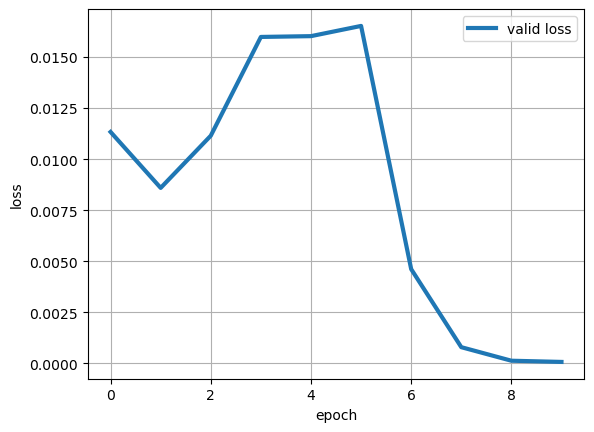

In [65]:
#pyplot.plot(train_loss, linewidth=3,label="train loss")
plt.plot(test_loss, linewidth=3, label="valid loss")
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

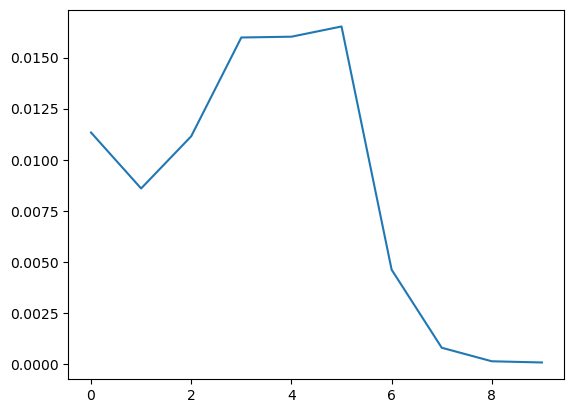

In [66]:
plt.plot(history.history['loss'])

# BiLSTM Model

In [67]:
# Length of the vocabulary in chars
vocab_size = imdb_encoder.vocab_size # len(chars)

# The embedding dimension
embedding_dim = 128

# Number of RNN units
rnn_units = 64

#batch size
BATCH_SIZE=50

In [68]:
dropout=0.2
def build_model_bilstm(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, mask_zero=True,batch_input_shape=[batch_size, None]),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(rnn_units, return_sequences=True, dropout=0.25)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(rnn_units, dropout=0.25)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return model

In [70]:
bilstm = build_model_bilstm(vocab_size = vocab_size,embedding_dim=embedding_dim, rnn_units=rnn_units,batch_size=BATCH_SIZE)
bilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (50, None, 128)           12023168  
                                                                 
 dropout_3 (Dropout)         (50, None, 128)           0         
                                                                 
 bidirectional_2 (Bidirectio  (50, None, 128)          98816     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (50, None, 128)           0         
                                                                 
 bidirectional_3 (Bidirectio  (50, 128)                98816     
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (50, 128)                

In [71]:
bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

In [72]:
encoded_train_batched = encoded_train.batch(BATCH_SIZE).prefetch(100)

In [73]:
bilstm.fit(encoded_train_batched, epochs=5)

Epoch 1/5


2023-06-21 10:57:25.451350: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-06-21 10:57:25.451853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-06-21 10:57:29.018735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with

500/500 [==============================] - 190s 359ms/step - loss: 0.3837 - accuracy: 0.8209 - precision: 0.8151 - recall: 0.8301
Epoch 2/5
500/500 [==============================] - 164s 328ms/step - loss: 0.1496 - accuracy: 0.9471 - precision: 0.9468 - recall: 0.9474
Epoch 3/5
500/500 [==============================] - 169s 339ms/step - loss: 0.0686 - accuracy: 0.9779 - precision: 0.9778 - recall: 0.9780
Epoch 4/5
500/500 [==============================] - 161s 321ms/step - loss: 0.0542 - accuracy: 0.9811 - precision: 0.9813 - recall: 0.9808
Epoch 5/5
500/500 [==============================] - 165s 329ms/step - loss: 0.0366 - accuracy: 0.9872 - precision: 0.9872 - recall: 0.9873


In [ ]:
# without dropput between layers [1.0472896423190832, 0.83548, 0.8025395, 0.88992]
bilstm.evaluate(encoded_test.batch(BATCH_SIZE))

500/500 [==============================] - 11s 21ms/step - loss: 1.0186 - accuracy: 0.8138 - precision: 0.7535 - recall: 0.9330 4s 


[1.0186095237731934,
 0.8138399720191956,
 0.7534565329551697,
 0.9329599738121033]